<a href="https://colab.research.google.com/github/Rojika1/AI-Lab-3-KNN-Implementation-Rojika-Gauro/blob/main/KNN_Arbitrary_point(4D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted Label for test point [24, 25000, 2, 1] is: B


/tmp/ipython-input-2-248978643.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_map = plt.cm.get_cmap('viridis', len(education_levels))


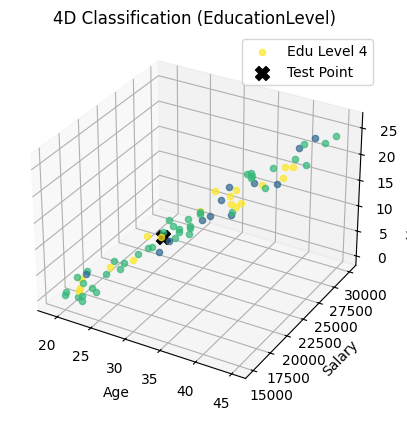

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter


df = pd.read_csv("/content/knndataset.csv")


if df['EducationLevel'].dtype == 'object':
    df['EducationLevel_code'] = pd.factorize(df['EducationLevel'])[0]
else:
    df['EducationLevel_code'] = df['EducationLevel']


training_data = df[['Age', 'Salary', 'YearsExperience', 'EducationLevel']].values.tolist()
training_labels = df['Label'].tolist()


test_point = [24, 25000, 2, 1]


def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))


def generate_k(n_samples):
    k = int(np.sqrt(n_samples))
    if k % 2 == 0:
        k += 1
    return max(1, k)


def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]


k = generate_k(len(training_data))
prediction = knn_predict(training_data, training_labels, test_point, k)
print(f"Predicted Label for test point {test_point} is: {prediction}")




education_levels = df['EducationLevel_code'].unique()
colors_map = plt.cm.get_cmap('viridis', len(education_levels))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(training_data)):
    age, salary, experience, edu_code = training_data[i]
    label = training_labels[i]
    color = colors_map(edu_code / (len(education_levels) - 1)) if len(education_levels) > 1 else colors_map(0)
    ax.scatter(age, salary, experience, c=[color], label=f"Edu Level {edu_code}" if i == 0 else "", alpha=0.7)


ax.scatter(test_point[0], test_point[1], test_point[2], c='black', marker='X', s=100, label='Test Point')

ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.set_zlabel('YearsExperience')
plt.title('4D Classification (EducationLevel)')
plt.legend()
plt.show()